# Old Dataset Generation

This notebook's purpose is to step through the generation of the datasets in use for this project.  'ACPA_EDA_AND_CLEAN.ipynb' is the original notebook in which all EDA and Experimentation is done, this notebook is designed to make the dataset process cleaner and more understandable.

In [105]:
#Importing Libraries
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [106]:
#Loading Data
raw_df = pd.read_csv('allegney_county_assesment.csv')
raw_df.describe()

C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (19,20,29,30,37,38,46,57,83) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,PROPERTYHOUSENUM,PROPERTYZIP,MUNICODE,SCHOOLCODE,OWNERCODE,USECODE,LOTAREA,SALEPRICE,PREVSALEPRICE,PREVSALEPRICE2,...,CONDITION,TOTALROOMS,BEDROOMS,FULLBATHS,HALFBATHS,FIREPLACES,BSMTGARAGE,FINISHEDLIVINGAREA,CARDNUMBER,TAXYEAR
count,580473.000000,580525.000000,580526.000000,580526.000000,580526.000000,580526.000000,5.805260e+05,5.706910e+05,3.705170e+05,1.943920e+05,...,445409.000000,445408.000000,445438.000000,445355.000000,441766.000000,411671.000000,425825.000000,445485.000000,445485.000000,580526.0
mean,1367.112415,15166.825255,683.599772,28.937491,12.490956,77.896799,4.073268e+04,1.243903e+05,9.375837e+04,7.693990e+04,...,3.151041,6.460297,3.025543,1.471426,0.482192,0.372960,0.693412,1691.002101,1.003307,2020.0
std,2020.534506,82.388892,341.340715,15.059178,3.548055,153.976063,5.823772e+06,8.655000e+05,1.038229e+06,5.796296e+05,...,0.780270,1.739973,0.902393,0.673222,0.565567,0.550268,0.819812,790.434554,0.113236,0.0
min,0.000000,15003.000000,101.000000,1.000000,10.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2020.0
25%,120.000000,15108.000000,202.000000,17.000000,10.000000,10.000000,3.200000e+03,1.000000e+00,1.000000e+00,1.000000e+00,...,3.000000,5.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1170.000000,1.000000,2020.0
50%,516.000000,15204.000000,873.000000,29.000000,12.000000,10.000000,6.823000e+03,3.990000e+04,1.750000e+04,1.200000e+04,...,3.000000,6.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1492.000000,1.000000,2020.0
75%,1711.000000,15221.000000,926.000000,46.000000,12.000000,70.000000,1.351000e+04,1.265000e+05,8.800000e+04,7.800000e+04,...,3.000000,7.000000,3.000000,2.000000,1.000000,1.000000,1.000000,2005.000000,1.000000,2020.0
max,39392.000000,16229.000000,953.000000,50.000000,28.000000,1111.000000,4.400388e+09,1.793957e+08,2.929078e+08,6.025000e+07,...,8.000000,87.000000,18.000000,13.000000,9.000000,22.000000,6.000000,33444.000000,45.000000,2020.0


In [107]:
#Helper Functions
#Detect if NAN
def isNaN(num):
    return num != num

#One-Hot encode
def col_split(column,index=[]):
    '''column = (pandas.Series) column of dataframe that we wish to split. Returns pandas.DataFrame with split columns.'''
    
    try:
        #Defining a Dictionary with all possible values as keys
        temp_dict = {}
        for element in column.unique():
            temp_dict[str(element)] = np.linspace(0,0,len(column))
    except AttributeError:
        print('Make sure you are passing in a Pandas Series (One Column)!')
        return
        
    #Sorting all observations
    for i in range(len(column)):
        temp_dict[str(column.iloc[i])][i] = 1              
    
    #Defining new Pandas DataFrame
    if len(index)==len(column):
        df = pd.DataFrame(temp_dict,columns=temp_dict.keys(),index=index)
    else:
        df = pd.DataFrame(temp_dict,columns=temp_dict.keys())
    
    #Returning Dataframe
    return df

def col_bool(column):
    '''column = (pandas.Series) column of dataframe that we wish to split. Returns pandas.DataFrame with binary column.'''
    
    #Length of column
    l = len(column)
    
    #Generating List 
    temp_list = np.linspace(0,0,l)
    for i in range(len(column)):
        if isNaN(column.iloc[i]) == False:
            temp_list[i] = 1
    return pd.DataFrame(temp_list,columns=[column.name])

#Calculate Percentage of Each Value Present in Column
def col_dist(df,column_name):
    '''df = (pandas.DataFrame) data dataframe for all data
       column_name = (str) name of column that we want the distribution from.'''
    print('Unique Values : ', np.sort(df[column_name].unique().astype(str)))
    l = len(df)
    try:
        temp = df.groupby(by = column_name)[column_name].count().sort_index()
    except TypeError:
        temp = df.groupby(by = column_name)[column_name].count()
    print('\nCount of Values w/o nan : ', temp)
    for i in range(len(temp)):
        print('\nValue {} Percentage = {}%'.format(i, round(list(temp)[i]/l*100,3)))
    return

# Old Residental Houses (Old)

This dataset includes all houses with relavant features and there is no requirement made for previous sales to have been made.

**Data Filtering**

In [108]:
#Getting only Parcels with Class == Residental
Full_filtered_df = raw_df[raw_df.CLASS == 'R']

#Data Percent Check
print('Percent of the Raw Data Perseved = {} with {} observations%'\
      .format(round((len(Full_filtered_df)*100)/len(raw_df),2),\
             len(Full_filtered_df)))

Percent of the Raw Data Perseved = 89.29 with 518373 observations%


In [109]:
#Getting only Parcels with Valid Sale Codes

#Selecting Only Valid Sales Indexes
valid_indicies = list()

for i in range(len(Full_filtered_df)):
    temp = str(Full_filtered_df['SALECODE'].iloc[i]).strip().capitalize()
    if temp == '0' or temp == 'UR' or temp == 'U':
        valid_indicies.append(i)
        
#Declaring new datasource - We can use 'valid_indicies' to correct all other dataframes later.
Full_filtered_df = Full_filtered_df.iloc[valid_indicies]

#Data Percent Check
print('Percent of the Raw Data Perseved = {} with {} observations%'\
      .format(round((len(Full_filtered_df)*100)/len(raw_df),2),\
             len(Full_filtered_df)))

Percent of the Raw Data Perseved = 26.33 with 152858 observations%


In [110]:
#Filtering Observations Within Lower and Upper Bounds
lower_bound = 10000
upper_bound = 1000000

Full_filtered_df = Full_filtered_df[Full_filtered_df.SALEPRICE >= lower_bound][Full_filtered_df.SALEPRICE <= upper_bound]
Full_filtered_df = Full_filtered_df[Full_filtered_df.COUNTYTOTAL >= lower_bound][Full_filtered_df.COUNTYTOTAL <= upper_bound]
Full_filtered_df = Full_filtered_df[Full_filtered_df.FAIRMARKETTOTAL >= lower_bound][Full_filtered_df.FAIRMARKETTOTAL <= upper_bound]
Full_filtered_df = Full_filtered_df[Full_filtered_df.LOCALTOTAL >= lower_bound][Full_filtered_df.LOCALTOTAL <= upper_bound]

Full_filtered_df = Full_filtered_df[Full_filtered_df.COUNTYLAND >= lower_bound][Full_filtered_df.COUNTYLAND <= upper_bound]
Full_filtered_df = Full_filtered_df[Full_filtered_df.FAIRMARKETLAND >= lower_bound][Full_filtered_df.FAIRMARKETLAND <= upper_bound]
Full_filtered_df = Full_filtered_df[Full_filtered_df.LOCALLAND >= lower_bound][Full_filtered_df.LOCALLAND <= upper_bound]

Full_filtered_df = Full_filtered_df[Full_filtered_df.COUNTYBUILDING >= lower_bound][Full_filtered_df.COUNTYBUILDING <= upper_bound]
Full_filtered_df = Full_filtered_df[Full_filtered_df.FAIRMARKETBUILDING >= lower_bound][Full_filtered_df.FAIRMARKETBUILDING <= upper_bound]
Full_filtered_df = Full_filtered_df[Full_filtered_df.LOCALBUILDING >= lower_bound][Full_filtered_df.LOCALBUILDING <= upper_bound]

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [111]:
#Dropping All Nans
Full_filtered_df = Full_filtered_df.dropna(subset = [
'CDU',
'PROPERTYZIP',
'NEIGHCODE',
'YEARBLT',
'PREVSALEPRICE',
'PREVSALEDATE',
'SALEDATE',
'CONDITION',
'GRADE',
'LOTAREA',
'COUNTYLAND',
'COUNTYBUILDING',
'COUNTYTOTAL',
'FAIRMARKETLAND',
'FAIRMARKETTOTAL',
'FAIRMARKETBUILDING',
'LOCALLAND',
'LOCALTOTAL',
'LOCALBUILDING',
'STYLEDESC',
'ROOFDESC',
'EXTFINISH_DESC',
'BASEMENTDESC',
'STORIES',
'TOTALROOMS',
'BEDROOMS',
'FULLBATHS',
'HALFBATHS',
'FINISHEDLIVINGAREA'
])

#Data Percent Check
print('Percent of the Raw Data Perseved = {} with {} observations%'\
      .format(round((len(Full_filtered_df)*100)/len(raw_df),2),\
             len(Full_filtered_df)))

Percent of the Raw Data Perseved = 12.35 with 71672 observations%


### Ordinal Encoding

We impose a ordinal relationship on the each variable opposed to one-hot encoding.  This is done in the intrest of decreasing dimensionality through the conversion of a n-option (n-dimensional) categorical variable into a 1-dimensional ordinal vector.

**STYLE**

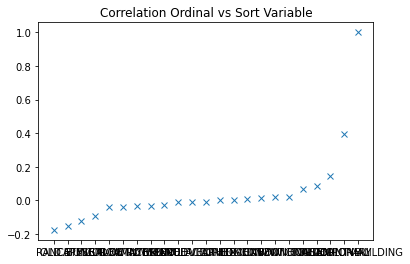

In [112]:
#One-Hot Encoding and Pairing Sorting Column
temp_df = pd.concat([col_split(Full_filtered_df['STYLEDESC'],index=Full_filtered_df.index),\
                     Full_filtered_df['COUNTYBUILDING']],axis=1)
plt.plot(temp_df.corr()['COUNTYBUILDING'].sort_values(),'x')
plt.title('Correlation Ordinal vs Sort Variable')
plt.show()

#Saving Sorting Column
temp_list = temp_df.corr()['COUNTYBUILDING'].sort_values().index

#Declaring Mapping Dictionary
map_dict = {}
for i in range(len(temp_list)):
    map_dict[temp_list[i]] = float(i+1)

#Mapping Values
temp_list = list()
for i in range(len(temp_df)):
    temp_list.append(map_dict[Full_filtered_df['STYLEDESC'].iloc[i]])

#Recreating Dataframe
Style_df = pd.DataFrame(preprocessing.scale(temp_list),columns=['STYLE'],index=temp_df.index)

**ROOF**

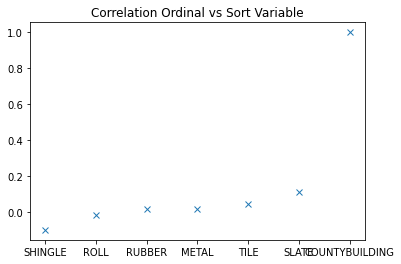

In [113]:
#One-Hot Encoding and Pairing Sorting Column
temp_df = pd.concat([col_split(Full_filtered_df['ROOFDESC'],index=Full_filtered_df.index),\
                     Full_filtered_df['COUNTYBUILDING']],axis=1)
plt.plot(temp_df.corr()['COUNTYBUILDING'].sort_values(),'x')
plt.title('Correlation Ordinal vs Sort Variable')
plt.show()

#Saving Sorting Column
temp_list = temp_df.corr()['COUNTYBUILDING'].sort_values().index

#Declaring Mapping Dictionary
map_dict = {}
for i in range(len(temp_list)):
    map_dict[temp_list[i]] = float(i+1)

#Mapping Values
temp_list = list()
for i in range(len(temp_df)):
    temp_list.append(map_dict[Full_filtered_df['ROOFDESC'].iloc[i]])

#Recreating Dataframe
Roof_df = pd.DataFrame(preprocessing.scale(temp_list),columns=['ROOF'],index=temp_df.index)

**EXTFINISH**

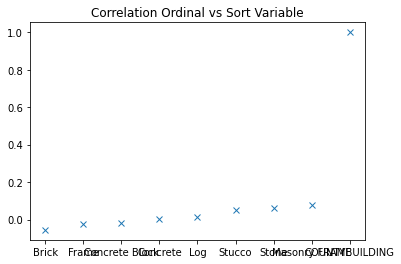

In [114]:
#One-Hot Encoding and Pairing Sorting Column
temp_df = pd.concat([col_split(Full_filtered_df['EXTFINISH_DESC'],index=Full_filtered_df.index),\
                     Full_filtered_df['COUNTYBUILDING']],axis=1)
plt.plot(temp_df.corr()['COUNTYBUILDING'].sort_values(),'x')
plt.title('Correlation Ordinal vs Sort Variable')
plt.show()

#Saving Sorting Column
temp_list = temp_df.corr()['COUNTYBUILDING'].sort_values().index

#Declaring Mapping Dictionary
map_dict = {}
for i in range(len(temp_list)):
    map_dict[temp_list[i]] = float(i+1)

#Mapping Values
temp_list = list()
for i in range(len(temp_df)):
    temp_list.append(map_dict[Full_filtered_df['EXTFINISH_DESC'].iloc[i]])

#Recreating Dataframe
Extfinish_df = pd.DataFrame(preprocessing.scale(temp_list),columns=['EXTFINISH'],index=temp_df.index)

**BASEMENT**

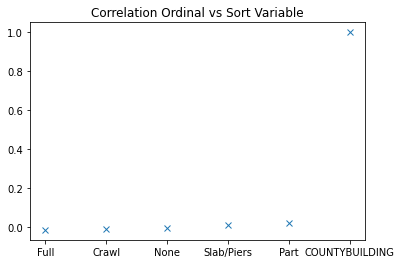

In [115]:
#One-Hot Encoding and Pairing Sorting Column
temp_df = pd.concat([col_split(Full_filtered_df['BASEMENTDESC'],index=Full_filtered_df.index),\
                     Full_filtered_df['COUNTYBUILDING']],axis=1)
plt.plot(temp_df.corr()['COUNTYBUILDING'].sort_values(),'x')
plt.title('Correlation Ordinal vs Sort Variable')
plt.show()

#Saving Sorting Column
temp_list = temp_df.corr()['COUNTYBUILDING'].sort_values().index

#Declaring Mapping Dictionary
map_dict = {}
for i in range(len(temp_list)):
    map_dict[temp_list[i]] = float(i+1)

#Mapping Values
temp_list = list()
for i in range(len(temp_df)):
    temp_list.append(map_dict[Full_filtered_df['BASEMENTDESC'].iloc[i]])

#Recreating Dataframe
Basement_df = pd.DataFrame(preprocessing.scale(temp_list),columns=['BASEMENT'],index=temp_df.index)

**ZIPCODE**

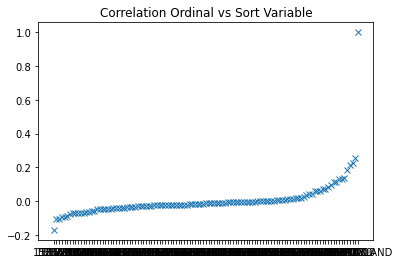

In [116]:
#One-Hot Encoding and Pairing Sorting Column
temp_df = pd.concat([col_split(Full_filtered_df['PROPERTYZIP'],index=Full_filtered_df.index),\
                     Full_filtered_df['COUNTYLAND']],axis=1)
plt.plot(temp_df.corr()['COUNTYLAND'].sort_values(),'x')
plt.title('Correlation Ordinal vs Sort Variable')
plt.show()

#Saving Sorting Column
temp_list = temp_df.corr()['COUNTYLAND'].sort_values().index

#Declaring Mapping Dictionary
map_dict = {}
for i in range(len(temp_list)):
    map_dict[temp_list[i]] = float(i+1)

#Mapping Values
temp_list = list()
for i in range(len(temp_df)):
    temp_list.append(map_dict[str(Full_filtered_df['PROPERTYZIP'].iloc[i])])

#Recreating Dataframe
Zip_df = pd.DataFrame(preprocessing.scale(temp_list),columns=['ZIPCODE'],index=temp_df.index)

**NEIGHBORHOOD**

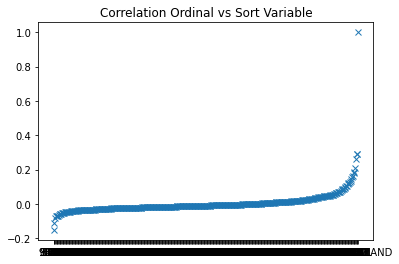

In [117]:
#One-Hot Encoding and Pairing Sorting Column
temp_df = pd.concat([col_split(Full_filtered_df['NEIGHCODE'],index=Full_filtered_df.index),\
                     Full_filtered_df['COUNTYLAND']],axis=1)
plt.plot(temp_df.corr()['COUNTYLAND'].sort_values(),'x')
plt.title('Correlation Ordinal vs Sort Variable')
plt.show()

#Saving Sorting Column
temp_list = temp_df.corr()['COUNTYLAND'].sort_values().index

#Declaring Mapping Dictionary
map_dict = {}
for i in range(len(temp_list)):
    map_dict[temp_list[i]] = float(i+1)

#Mapping Values
temp_list = list()
for i in range(len(temp_df)):
    temp_list.append(map_dict[Full_filtered_df['NEIGHCODE'].iloc[i]])

#Recreating Dataframe
Hood_df = pd.DataFrame(preprocessing.scale(temp_list),columns=['HOOD'],index=temp_df.index)

### Other Processing

**YEARSBLT**

In [118]:
#Getting YearsOld by looking at the difference in Yearblt and a reference year
Yearsold_df = list()

Reference_Year = 2020

for i in range(len(Full_filtered_df)):
    Yearsold_df.append(Reference_Year - Full_filtered_df['YEARBLT'].iloc[i])

Yearsold_df = pd.DataFrame(preprocessing.scale(Yearsold_df),\
                           columns=['YEARSOLD'],index=Full_filtered_df.index)

**SALEDATE**

In [119]:
#Converting Saledate into a numerical format representative of the number of days
# from a reference date that is manually inputed (currently 5/5/2020).
Saledate_df = pd.to_datetime(Full_filtered_df['SALEDATE'])

temp_list = list()
for i in range(len(Saledate_df)):
    temp = (datetime.datetime(year=2020, month = 5, day=5) - \
    Saledate_df.iloc[i])
    temp_list.append(temp.days)
    
Saledate_df = pd.DataFrame(preprocessing.scale(temp_list),columns=['SALEDATE'],\
                          index=Saledate_df.index)

**COUNTS**

In [120]:
Saledate_short_df = pd.to_datetime(Full_filtered_df['SALEDATE']).dt.to_period('m')
Saledate_short_df = pd.DataFrame(Saledate_short_df)

temp = Saledate_short_df.groupby(by = 'SALEDATE')['SALEDATE'].count().values
temp = pd.Series(temp,index=Saledate_short_df.groupby(by = 'SALEDATE')['SALEDATE']\
                 .count().index.to_series().astype(str))

temp_res = preprocessing.scale(np.array(temp).reshape(-1,1))

map_dict = {}
for i in range(len(temp)):
    map_dict[temp.index[i]] = temp_res[i]
    
Counts_df = list()
store = Saledate_short_df['SALEDATE'].astype(str)
for i in range(len(Saledate_short_df)):
    Counts_df.append(map_dict[store.iloc[i]])

Counts_df = pd.DataFrame(Counts_df,columns=['COUNTS'],index=Full_filtered_df.index)

**CDU**

In [121]:
Cdu_df = Full_filtered_df['CDU']
switcher  = {
    'EX' : 1,
    'VG' : 2,
    'GD' : 3,
    'AV' : 4,
    'FR' : 5,
    'PR' : 6,
    'VP' : 7,
    'UN' : 8
}
temp = np.linspace(0,0,len(temp_df))

#Mapping Values
for i in range(len(temp_df)):
    temp[i] = switcher[Cdu_df.iloc[i]]
    
#Defining Dataframe
Cdu_df = pd.DataFrame(preprocessing.scale(temp),columns=['CDU'],index=Full_filtered_df.index)

**GRADE**

In [122]:
Grade_df = Full_filtered_df['GRADE']
switcher  = {
    'A+' : 1,
    'X+' : 1,
    'XX+': 1,
    'A' : 2,
    'X' : 2,
    'XX': 2,
    'A-': 3,
    'X-': 3,
    'XX-': 3,
    'B+': 4,
    'B' : 5,
    'B-': 6,
    'C+': 7,
    'C' : 8,
    'C-': 9,
    'D+': 10,
    'D' : 11,
    'D-': 12,
    'E+': 13,
    'E' : 14,
    'E-': 15    
}
temp = np.linspace(0,0,len(temp_df))

#Mapping Values
for i in range(len(temp_df)):
    temp[i] = switcher[Grade_df.iloc[i]]
    
#Redefining Dataframe
Grade_df = pd.DataFrame(preprocessing.scale(temp),columns=['GRADE'],index=Full_filtered_df.index)

**CONDITION**

In [123]:
Condition_df = pd.DataFrame(preprocessing.scale(Full_filtered_df['CONDITION'].values),\
                                                columns=['CONDITION'],index=Full_filtered_df.index)

**LOTAREA**

In [124]:
Lotarea_df = pd.DataFrame(preprocessing.scale(Full_filtered_df['LOTAREA'].values),columns=['LOTAREA'],\
                          index=Full_filtered_df.index)

**TOTAL ASSESSMENTS**

In [125]:
Countytotal_df = pd.DataFrame(preprocessing.scale(Full_filtered_df['COUNTYTOTAL'].values),columns=['COUNTYTOTAL'],\
                              index=Full_filtered_df.index)
Fairmarkettotal_df = pd.DataFrame(preprocessing.scale(Full_filtered_df['FAIRMARKETTOTAL'].values),columns=['FAIRMARKETTOTAL'],\
                              index=Full_filtered_df.index)
Localtotal_df = pd.DataFrame(preprocessing.scale(Full_filtered_df['LOCALTOTAL'].values),columns=['LOCALTOTAL'],\
                              index=Full_filtered_df.index)

**BUILDING ASSESSMENTS**

In [126]:
Countybuilding_df = pd.DataFrame(preprocessing.scale(Full_filtered_df['COUNTYBUILDING'].values),columns=['COUNTYBUILDING'],\
                              index=Full_filtered_df.index)
Fairmarketbuilding_df = pd.DataFrame(preprocessing.scale(Full_filtered_df['FAIRMARKETBUILDING'].values),\
                                     columns=['FAIRMARKETBUILDING'],index=Full_filtered_df.index)
Localbuilding_df = pd.DataFrame(preprocessing.scale(Full_filtered_df['LOCALBUILDING'].values),columns=['LOCALBUILDING'],\
                              index=Full_filtered_df.index)

**LAND ASSESSMENTS**

In [127]:
Countyland_df = pd.DataFrame(preprocessing.scale(Full_filtered_df['COUNTYLAND'].values),columns=['COUNTYLAND'],\
                              index=Full_filtered_df.index)
Fairmarketland_df = pd.DataFrame(preprocessing.scale(Full_filtered_df['FAIRMARKETLAND'].values),\
                                     columns=['FAIRMARKETLAND'],index=Full_filtered_df.index)
Localland_df = pd.DataFrame(preprocessing.scale(Full_filtered_df['LOCALLAND'].values),columns=['LOCALLAND'],\
                              index=Full_filtered_df.index)

**STORIES**

In [128]:
Stories_df = pd.DataFrame(preprocessing.scale(Full_filtered_df['STORIES']),columns=['STORIES'],index=Full_filtered_df.index)

**TOTALROOMS**

In [129]:
Totalrooms_df = pd.DataFrame(preprocessing.scale(Full_filtered_df['TOTALROOMS']),columns=['TOTALROOMS'],\
                             index=Full_filtered_df.index)

**BEDROOMS**

In [130]:
Bedrooms_df = pd.DataFrame(preprocessing.scale(Full_filtered_df['BEDROOMS']),columns=['BEDROOMS'],index=Full_filtered_df.index)

**FULLBATHS**

In [131]:
Fullbaths_df = pd.DataFrame(preprocessing.scale(Full_filtered_df['FULLBATHS']),columns=['FULLBATHS'],\
                            index=Full_filtered_df.index)

**HALFBATHS**

In [132]:
Halfbaths_df = pd.DataFrame(preprocessing.scale(Full_filtered_df['HALFBATHS']),columns=['HALFBATHS'],\
                            index=Full_filtered_df.index)

**FINISHEDLIVINGAREA**

In [133]:
Finishedlivingarea_df = pd.DataFrame(preprocessing.scale(Full_filtered_df['FINISHEDLIVINGAREA']),\
                                     columns=['FINISHEDLIVINGAREA'],index=Full_filtered_df.index)

**PREVSALEDATE**

In [134]:
Prevsaledate_df = pd.to_datetime(Full_filtered_df['PREVSALEDATE'])

temp_list = list()
for i in range(len(Prevsaledate_df)):
    temp = (datetime.datetime(year = 2020, month = 5, day=5) - Prevsaledate_df.iloc[i])
    temp_list.append(temp.days)

Prevsaledate_df = pd.DataFrame(preprocessing.scale(temp_list),columns=['PREVSALEDATE'],\
                               index=Prevsaledate_df.index)

**PREVSALEPRICE**

In [135]:
Prevsaleprice_df = pd.DataFrame(preprocessing.scale(Full_filtered_df['PREVSALEPRICE']),columns=['PREVSALEPRICE'],\
                                index=Full_filtered_df.index)

**SALEPRICE - Target Variable**

In [136]:
Saleprice_df = pd.DataFrame(Full_filtered_df['SALEPRICE'],columns=['SALEPRICE'],index=Full_filtered_df.index)

### Exporting Dataset

In [137]:
#Combing Data and Creating Output
Output_df = pd.concat([Style_df,
    Roof_df,
    Extfinish_df,
    Basement_df,
    Zip_df,
    Hood_df,
    Yearsold_df,
    Prevsaleprice_df,
    Prevsaledate_df,
    Saledate_df,
    Counts_df,
    Cdu_df,
    Grade_df,
    Condition_df,
    Lotarea_df,
    Countytotal_df,
    Fairmarkettotal_df,
    Localtotal_df,
    Countybuilding_df,
    Fairmarketbuilding_df,
    Localbuilding_df,
    Countyland_df,
    Fairmarketland_df,
    Localland_df,
    Stories_df,
    Totalrooms_df,
    Bedrooms_df,
    Fullbaths_df,
    Halfbaths_df,
    Finishedlivingarea_df,
    Saleprice_df],axis=1)

Output_df.to_csv('Old_Dataset.csv')